## Timeline Analysis : Covid-19
# Name-Purva Dharmadhikari

In [ ]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import matplotlib.colors as mcolors

In [3]:
#Reading the Data
covid_data = pd.read_csv('owid-covid-data.csv');
covid_data.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
5,AFG,Asia,Afghanistan,2020-02-29,1.0,0.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
6,AFG,Asia,Afghanistan,2020-03-01,1.0,0.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
7,AFG,Asia,Afghanistan,2020-03-02,1.0,0.0,0.000,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
8,AFG,Asia,Afghanistan,2020-03-03,2.0,1.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
9,AFG,Asia,Afghanistan,2020-03-04,4.0,2.0,0.429,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [4]:
# Analyzing the rows and columns count of the dataset
covid_data.shape

(61095, 55)

In [5]:
# Analyzing the data types of all the attributes present and their count
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61095 entries, 0 to 61094
Data columns (total 55 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               60747 non-null  object 
 1   continent                              60383 non-null  object 
 2   location                               61095 non-null  object 
 3   date                                   61095 non-null  object 
 4   total_cases                            60491 non-null  float64
 5   new_cases                              60484 non-null  float64
 6   new_cases_smoothed                     59529 non-null  float64
 7   total_deaths                           52008 non-null  float64
 8   new_deaths                             52007 non-null  float64
 9   new_deaths_smoothed                    59529 non-null  float64
 10  total_cases_per_million                60143 non-null  float64
 11  ne

In [6]:
# Identifying the columns present
covid_data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred',
       'new_vaccinations_smoothed_per_mil

In [7]:
# Descripting of the numerical attributes present in the dataset
covid_data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,6.049100e+04,60484.000000,59529.000000,5.200800e+04,52007.000000,59529.000000,60143.000000,60136.000000,59186.000000,51673.000000,...,58157.000000,39805.000000,58755.000000,59441.000000,46383.000000,45748.000000,29411.000000,53977.000000,60435.000000,58417.000000
mean,3.091173e+05,3152.706534,3142.942089,1.000453e+04,79.112350,67.827110,5340.872833,58.759216,58.545813,133.686803,...,19188.795438,13.165630,256.219700,7.767929,10.579138,32.637189,51.127705,3.042143,73.142646,0.715787
std,3.038887e+06,28064.610365,27690.782313,7.990094e+04,586.119965,526.257402,10855.487888,164.372833,136.110955,247.984691,...,19667.294491,19.878614,118.076864,3.890485,10.415240,13.451339,31.774171,2.471470,7.548937,0.153768
min,1.000000e+00,-46076.000000,-1121.714000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,5.090000e+02,1.000000,4.429000,2.700000e+01,0.000000,0.000000,103.469000,0.067000,0.801000,4.666000,...,4541.795000,0.500000,164.905000,5.290000,1.900000,21.600000,20.859000,1.300000,67.440000,0.590000
50%,5.170000e+03,42.000000,51.714000,1.590000e+02,1.000000,0.714000,797.692000,4.778000,6.463000,24.359000,...,13111.214000,2.000000,241.219000,7.110000,6.300000,31.400000,49.839000,2.400000,74.620000,0.750000
75%,5.227200e+04,483.250000,516.714000,1.445250e+03,11.000000,8.429000,5001.823000,43.474000,48.263250,122.935000,...,27216.445000,21.200000,325.721000,10.080000,19.300000,41.100000,83.241000,4.000000,78.570000,0.843000
max,9.616793e+07,856352.000000,738108.429000,2.057215e+06,17330.000000,13718.000000,118993.076000,8652.658000,2648.773000,1915.257000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


In [8]:
#Checking for count of all the unique values present for each attribute
covid_data.nunique()

iso_code                                   191
continent                                    6
location                                   192
date                                       386
total_cases                              29946
new_cases                                 7224
new_cases_smoothed                       14960
total_deaths                             10368
new_deaths                                1457
new_deaths_smoothed                       3552
total_cases_per_million                  45599
new_cases_per_million                    25945
new_cases_smoothed_per_million           29278
total_deaths_per_million                 26441
new_deaths_per_million                    5222
new_deaths_smoothed_per_million           6351
reproduction_rate                          361
icu_patients                              1783
icu_patients_per_million                  3547
hosp_patients                             3286
hosp_patients_per_million                 5505
weekly_icu_ad

In [9]:
# Checking for count of NULL values for each column 
covid_data.isnull().sum()

iso_code                                   348
continent                                  712
location                                     0
date                                         0
total_cases                                604
new_cases                                  611
new_cases_smoothed                        1566
total_deaths                              9087
new_deaths                                9088
new_deaths_smoothed                       1566
total_cases_per_million                    952
new_cases_per_million                      959
new_cases_smoothed_per_million            1909
total_deaths_per_million                  9422
new_deaths_per_million                    9423
new_deaths_smoothed_per_million           1909
reproduction_rate                        12339
icu_patients                             54555
icu_patients_per_million                 54555
hosp_patients                            53504
hosp_patients_per_million                53504
weekly_icu_ad

In [10]:
# Continents in terms of occurence of covid cases on basis of iso_codes
covid_data.continent.value_counts()[0:10]

Africa           16734
Asia             15379
Europe           15352
North America     7353
South America     3898
Oceania           1667
Name: continent, dtype: int64

In [11]:
# Analyzing cases worldwide 
dataset = covid_data[covid_data['date']=='2020-11-15']
dataset = dataset[~dataset['location'].isin(['World','International'])]
dataset.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
265,AFG,Asia,Afghanistan,2020-11-15,43240.0,205.0,154.429,1620.0,12.0,7.857,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.498
582,ALB,Europe,Albania,2020-11-15,27830.0,597.0,517.714,623.0,11.0,9.143,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785
912,DZA,Africa,Algeria,2020-11-15,67679.0,860.0,804.000,2154.0,15.0,15.143,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.754
1236,AND,Europe,Andorra,2020-11-15,5872.0,147.0,69.857,76.0,1.0,0.143,...,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.858
1542,AGO,Africa,Angola,2020-11-15,13451.0,77.0,145.429,322.0,0.0,2.143,...,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581
1855,ATG,North America,Antigua and Barbuda,2020-11-15,134.0,0.0,0.429,4.0,0.0,0.143,...,21490.943,NaN,191.511,13.17,NaN,NaN,NaN,3.80,77.02,0.780
2240,ARG,South America,Argentina,2020-11-15,1310491.0,5645.0,9758.429,35436.0,129.0,268.000,...,18933.907,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.825
2566,ARM,Asia,Armenia,2020-11-15,117337.0,1482.0,1559.000,1763.0,25.0,29.143,...,8787.580,1.8,341.010,7.11,1.5,52.1,94.043,4.20,75.09,0.755
2926,AUS,Oceania,Australia,2020-11-15,27749.0,38.0,12.000,907.0,0.0,0.000,...,44648.710,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939
3256,AUT,Europe,Austria,2020-11-15,203956.0,5665.0,7257.571,1829.0,83.0,59.714,...,45436.686,0.7,145.183,6.35,28.4,30.9,NaN,7.37,81.54,0.908


In [12]:
# looking at different locations
covid_data["location"].value_counts()

Argentina           386
Mexico              385
Thailand            382
Taiwan              370
China               365
                   ... 
Solomon Islands     100
Marshall Islands     84
Hong Kong            83
Vanuatu              71
Samoa                63
Name: location, Length: 192, dtype: int64

In [13]:
# covid cases in india

india=covid_data[covid_data["location"]=="India"]

In [14]:
india.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
24632,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
24633,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
24634,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
24635,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
24636,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64


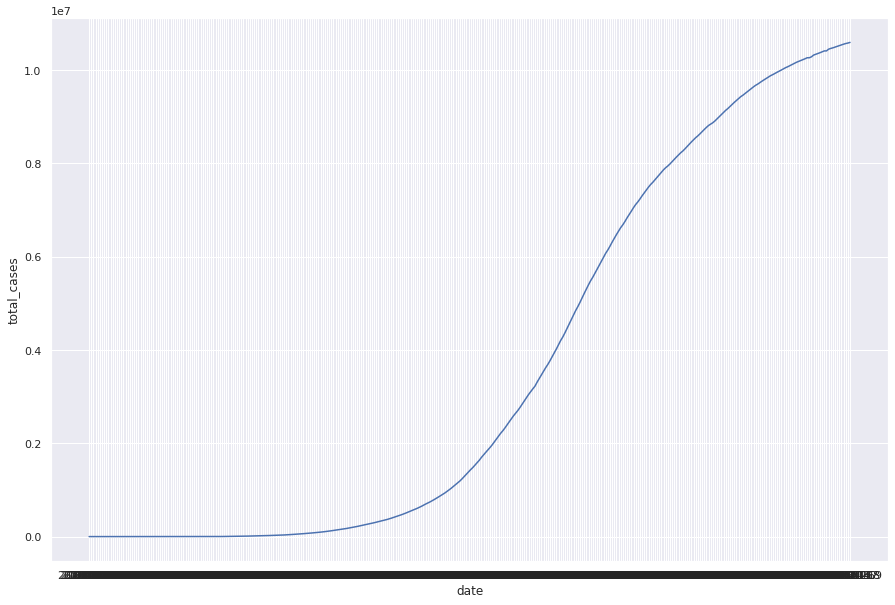

In [16]:
#Data Visualization
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_cases",data=india)
plt.show()

In [17]:
india_last_5_days=india.tail()

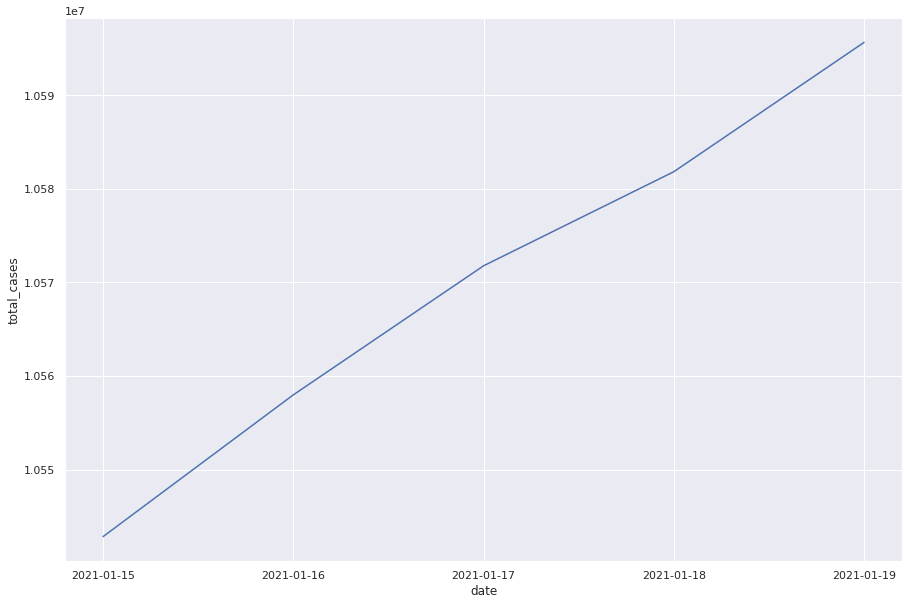

In [18]:
# total cases last 5 days

sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_cases",data=india_last_5_days)
plt.show()

In [19]:
# covid cases in Brazil

brazil=covid_data[covid_data["location"]=="Brazil"]

In [20]:
brazil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
7464,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
7465,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
7466,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
7467,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
7468,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759


In [21]:
brazil.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
7789,BRA,South America,Brazil,2021-01-16,8455059.0,61567.0,54151.571,209296.0,1050.0,952.143,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
7790,BRA,South America,Brazil,2021-01-17,8488099.0,33040.0,54615.571,209847.0,551.0,963.857,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
7791,BRA,South America,Brazil,2021-01-18,8511770.0,23671.0,54308.286,210299.0,452.0,959.857,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
7792,BRA,South America,Brazil,2021-01-19,8573864.0,62094.0,54032.429,211491.0,1192.0,971.571,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
7793,BRA,South America,Brazil,2021-01-20,NaN,NaN,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759


In [22]:
brazil_last_5_days=brazil.tail()

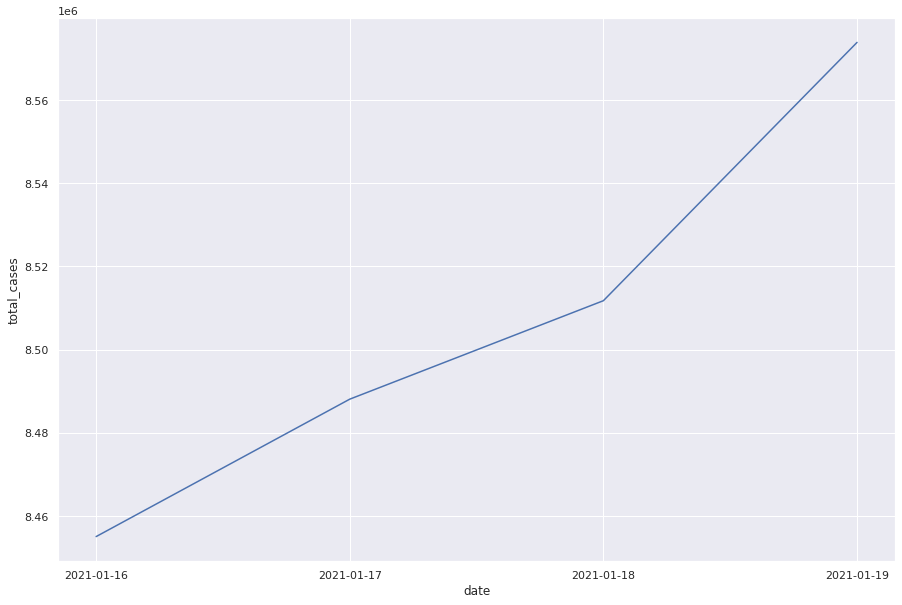

In [23]:
# total cases last 5 days

sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_cases",data=brazil_last_5_days)
plt.show()

In [24]:
# understanding cases of india,china and japan

india_japan_china=covid_data[(covid_data["location"]=="India") | (covid_data["location"]=="China") | (covid_data["location"]=="Japan")]

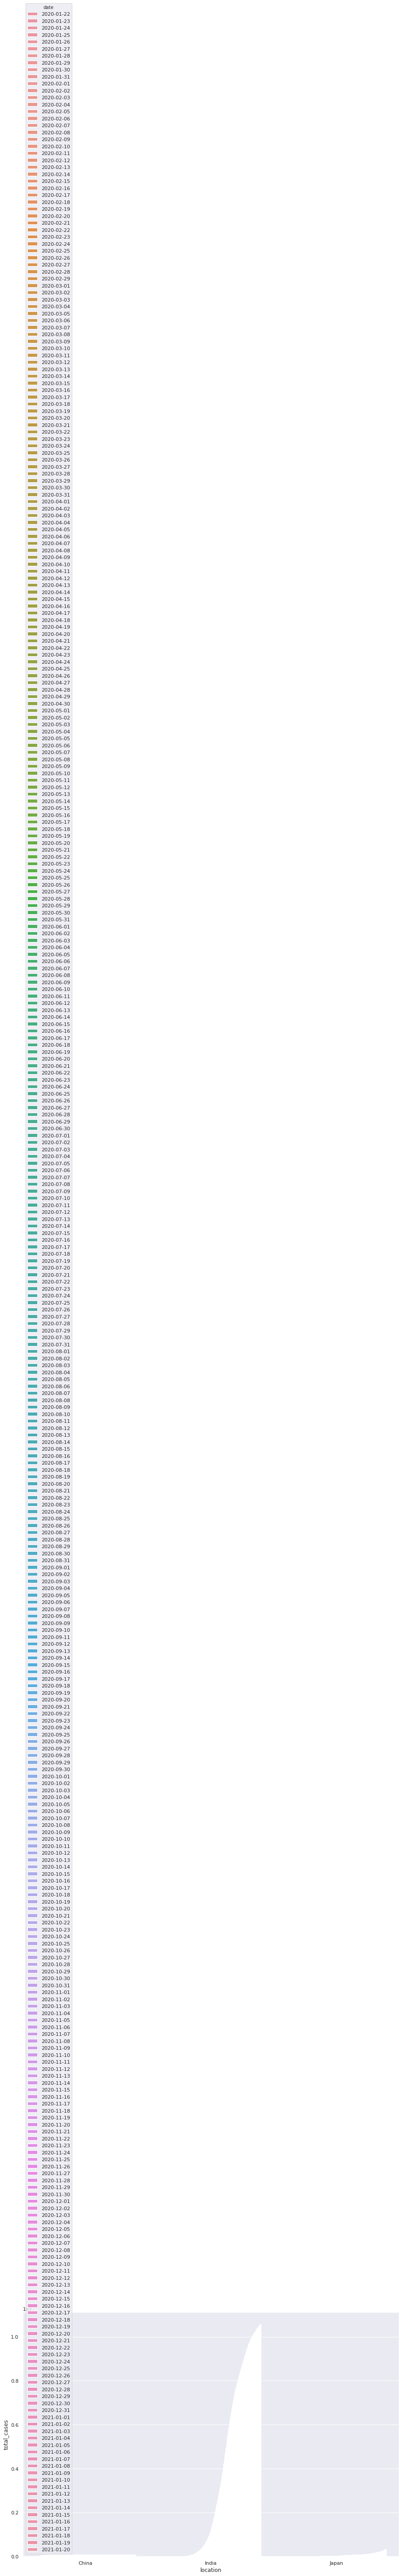

In [26]:
# total cases 

sns.set(rc={"figure.figsize":(15,10)})
sns.barplot(x="location",y="total_cases",data=india_japan_china,hue="date")
plt.show()

In [27]:
# understanding cases of germany and spain


germany_spain=covid_data[(covid_data["location"]=="Germany") | (covid_data["location"]=="Spain")]

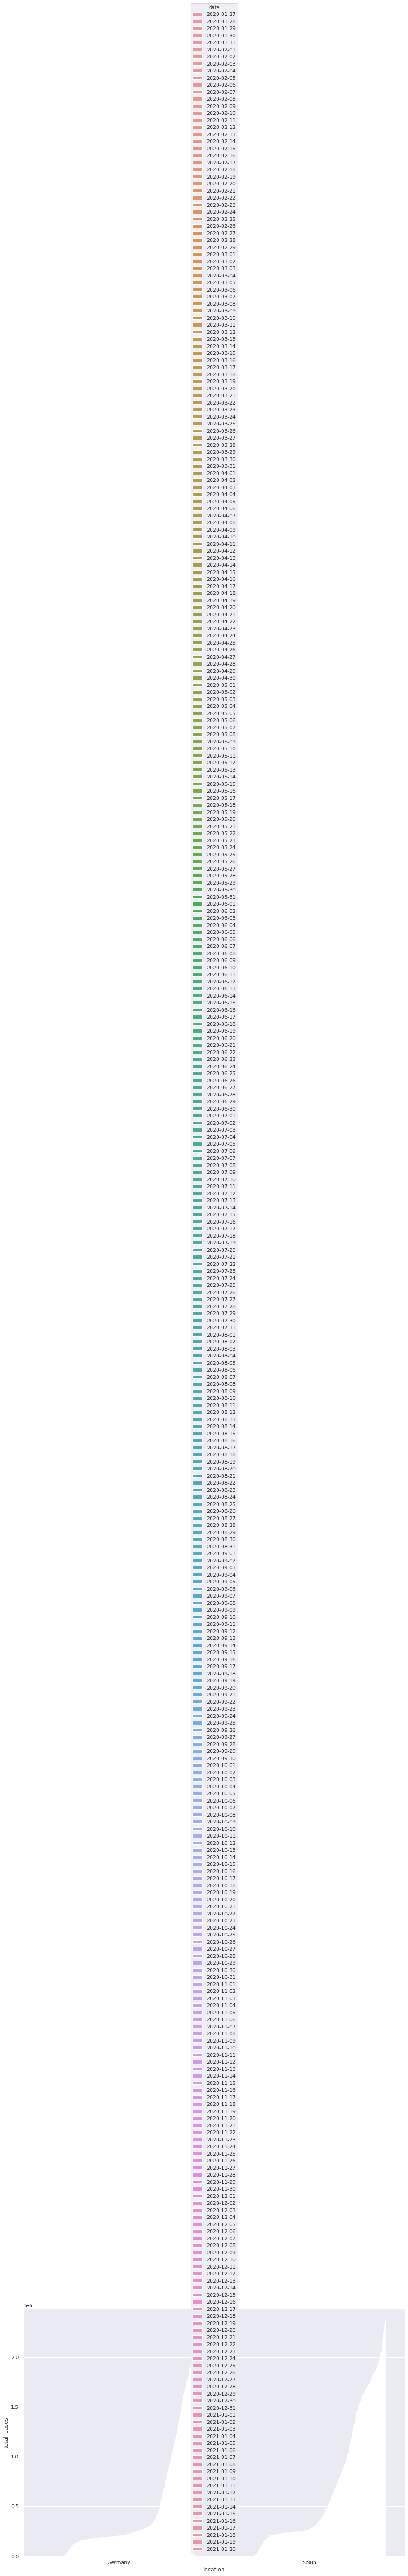

In [28]:
# total cases 

sns.set(rc={"figure.figsize":(15,10)})
sns.barplot(x="location",y="total_cases",data=germany_spain,hue="date")
plt.show()

In [29]:
# getting latset data

last_day_cases=covid_data[(covid_data["date"]=="2020-12-18")]
last_day_cases

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
298,AFG,Asia,Afghanistan,2020-12-18,49621.0,243.0,215.000,2030.0,5.0,12.143,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.498
615,ALB,Europe,Albania,2020-12-18,52004.0,580.0,734.429,1066.0,11.0,12.714,...,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.785
945,DZA,Africa,Algeria,2020-12-18,94371.0,438.0,464.286,2647.0,7.0,10.286,...,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.754
1269,AND,Europe,Andorra,2020-12-18,7519.0,53.0,40.429,80.0,1.0,0.286,...,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.858
1575,AGO,Africa,Angola,2020-12-18,16562.0,78.0,71.571,384.0,2.0,2.714,...,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59799,VNM,Asia,Vietnam,2020-12-18,1410.0,3.0,2.714,35.0,0.0,0.000,...,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.694
60163,OWID_WRL,NaN,World,2020-12-18,75732956.0,718161.0,644413.143,1675148.0,12619.0,11422.714,...,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,NaN
60448,YEM,Asia,Yemen,2020-12-18,2087.0,0.0,0.714,606.0,0.0,0.000,...,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.452
60756,ZMB,Africa,Zambia,2020-12-18,18575.0,71.0,59.143,373.0,4.0,1.143,...,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.588


In [30]:
# sorting date w.r.t to total cases

max_cases_country=last_day_cases.sort_values(by="total_cases",ascending=False)
max_cases_country

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
60163,OWID_WRL,NaN,World,2020-12-18,75732956.0,718161.0,644413.143,1675148.0,12619.0,11422.714,...,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,NaN
58109,USA,North America,United States,2020-12-18,17519438.0,250217.0,219718.286,313896.0,2795.0,2576.429,...,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86,0.924
24955,IND,Asia,India,2020-12-18,10004599.0,25152.0,25403.429,145136.0,347.0,358.286,...,6426.674,21.2,282.280,10.39,1.900,20.600,59.550,0.530,69.66,0.640
7760,BRA,South America,Brazil,2020-12-18,7162978.0,52544.0,46678.714,185650.0,823.0,744.714,...,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200,75.88,0.759
45189,RUS,Europe,Russia,2020-12-18,2764843.0,28116.0,27217.714,49170.0,602.0,542.857,...,24765.954,0.1,431.297,6.18,23.400,58.300,NaN,8.050,72.58,0.816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59124,VAT,Europe,Vatican,2020-12-18,27.0,0.0,0.000,NaN,NaN,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN
49829,SLB,Oceania,Solomon Islands,2020-12-18,17.0,0.0,0.000,NaN,NaN,0.000,...,2205.923,25.1,459.780,18.68,NaN,NaN,35.890,1.400,73.00,0.546
34770,MHL,Oceania,Marshall Islands,2020-12-18,4.0,0.0,0.000,NaN,NaN,0.000,...,3819.202,NaN,557.793,30.53,NaN,NaN,82.502,2.700,73.70,0.708
46489,WSM,Oceania,Samoa,2020-12-18,2.0,0.0,0.000,NaN,NaN,0.000,...,6021.557,NaN,348.977,9.21,16.700,38.100,NaN,NaN,73.32,0.713


In [31]:
# top 5 countries with maximum case
max_cases_country[1:6]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
58109,USA,North America,United States,2020-12-18,17519438.0,250217.0,219718.286,313896.0,2795.0,2576.429,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
24955,IND,Asia,India,2020-12-18,10004599.0,25152.0,25403.429,145136.0,347.0,358.286,...,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,0.53,69.66,0.640
7760,BRA,South America,Brazil,2020-12-18,7162978.0,52544.0,46678.714,185650.0,823.0,744.714,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.759
45189,RUS,Europe,Russia,2020-12-18,2764843.0,28116.0,27217.714,49170.0,602.0,542.857,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.816
19719,FRA,Europe,France,2020-12-18,2499529.0,16005.0,13207.143,60345.0,612.0,381.857,...,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901


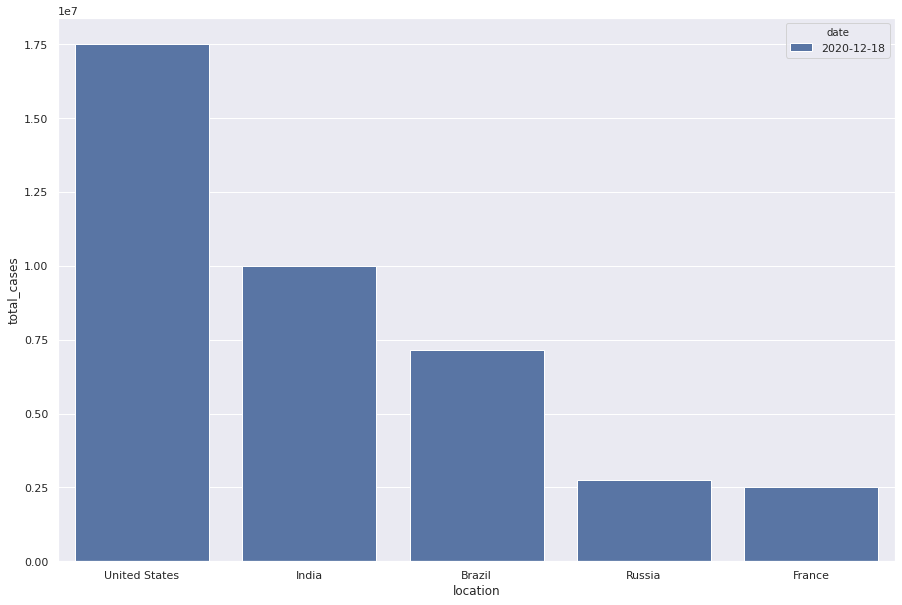

In [32]:
# plot on bar plot

sns.barplot(x="location",y="total_cases",data=max_cases_country[1:6],hue="date")
plt.show()